In [1]:
import numpy as np
import MDAnalysis as mda
import nmrformd as nmrmd
import sys, os, git
from matplotlib import pyplot as plt

/home/simon/.local/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


In [2]:
from scipy import constants as cst
spin = 0.5
GAMMA = 2 * np.pi * 42.6e6
K = (3 / 2) * (cst.mu_0 / 4 / np.pi) ** 2 \
    * cst.hbar ** 2 * GAMMA ** 4 * spin * (1 + spin)  # m6 / s2

In [3]:
u = mda.Universe("system.data", "dump.xtc")
ALL = u.select_atoms("all")
nmr = nmrmd.NMR(u, atom_group = ALL, number_i=100)

# G

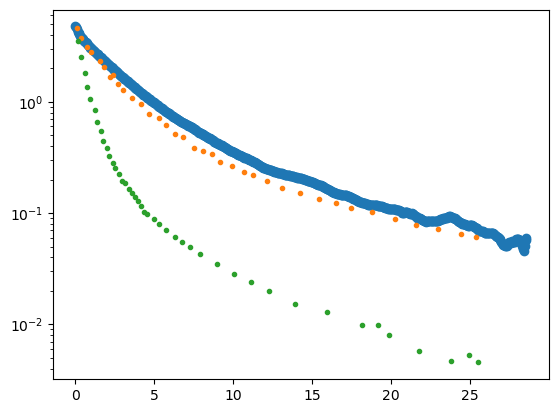

In [5]:
sigma = 3 # A
tconvert = 463.79e-15 # s
Tgrivet_08 = np.loadtxt("data-G/T0.8.dat")
Tgrivet_30 = np.loadtxt("data-G/T3.0.dat")
plt.semilogy(nmr.t/(tconvert*1e12), nmr.gij[0]*(sigma)**6, 'o')
plt.semilogy(Tgrivet_08.T[0], Tgrivet_08.T[1], '.')
plt.semilogy(Tgrivet_30.T[0], Tgrivet_30.T[1], '.')

# J

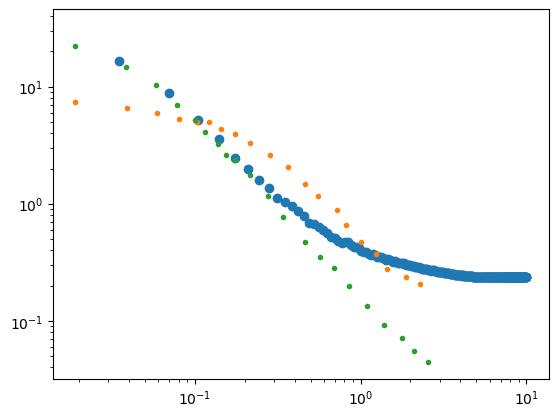

In [7]:
Tgrivet_08 = np.loadtxt("data-J/T0.8.dat")
Tgrivet_30 = np.loadtxt("data-J/T3.0.dat")
plt.loglog(nmr.f/1e6*(tconvert*1e12), nmr.J[0]/tconvert*(sigma)**6, 'o')
plt.loglog(Tgrivet_08.T[0], Tgrivet_08.T[1], '.')
plt.loglog(Tgrivet_30.T[0], Tgrivet_30.T[1], '.')

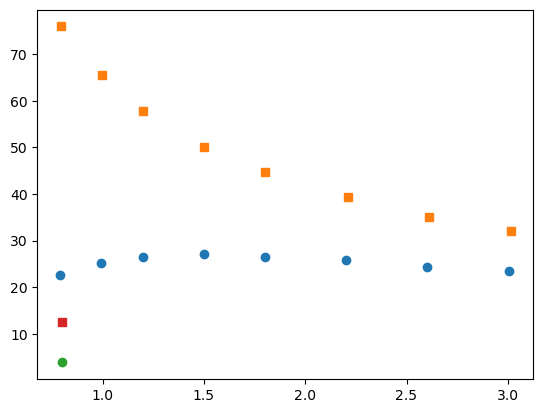

In [19]:
R1_grivet = np.loadtxt("data-R1-R2/R1.dat")
R2_grivet = np.loadtxt("data-R1-R2/R2.dat")
plt.plot(R1_grivet.T[0], R1_grivet.T[1], 'o')
plt.plot(R2_grivet.T[0], R2_grivet.T[1], 's')
plt.plot(0.8, nmr.R1[2] / K * (3e-10)**6 / (463.79e-15), 'o') # factor 6 ?
plt.plot(0.8, nmr.R2[2] / K * (3e-10)**6 / (463.79e-15), 's') # factor 6 ?